##### dev-2-eda-views notebook
***

<h1>Data cleaning and views</h1>



***

### import required libraries

In [61]:
import os # for setting the current directory

import numpy as np
import pandas as pd

import sqlite3

import pandasql

In [62]:
# set the current working directory
os.chdir("c:/users/jd/flatiron/project01/dsc-mod-1-project-v2-1-online-ds-ft-120919/")

# print the current working directory
print(os.getcwd())

c:\users\jd\flatiron\project01\dsc-mod-1-project-v2-1-online-ds-ft-120919


### connect to and preview sqlite database

In [63]:
# connect to sql movies_db data source and instantiate a cursor
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

### make a list of table names

In [64]:
# get names of all tables in the sql database
sql_tables = conn.execute("select name from sqlite_master where type='table';")

# assign table names to a variable as a list for future iteration
table_list = list(map(lambda x: x[0], sql_tables.fetchall()))
table_list

['bom_movie_gross',
 'imdb_name_basics',
 'imdb_title_akas',
 'imdb_title_basics',
 'imdb_title_crew',
 'imdb_title_principals',
 'imdb_title_ratings',
 'rt_movie_info',
 'rt_reviews',
 'tmdb_movies',
 'tn_movie_budgets']

### import helper functions

In [65]:
from importlib import reload

import helper_functions as hf

In [66]:
# `helper_functions` includes `get_table_list(conn)`, 
# `load_table(conn, table_name)` and `convert_dollars_to_int(df, col)
# note: `get_table_list(conn)` result the same as the above `table_list`
reload(hf)

<module 'helper_functions' from 'c:\\users\\jd\\flatiron\\project01\\dsc-mod-1-project-v2-1-online-ds-ft-120919\\helper_functions.py'>

### preview and identify relevant tables and columns

In [67]:
# function to preview all tables from sqlite_master
# or a sub - set entered as a list
def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [68]:
preview_tables(conn)

Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


----------------------------------------------------------------------------------------------------
Showing Table: rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


----------------------------------------------------------------------------------------------------
Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
finished


#### Preview suggests columns of interest regarding box office performance and genre
   
    >  bom_movie_gross: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
    >  imdb_title_basics: ['primary_title', 'start_year', 'genres']
    >  rt_movie_info: ['genre', 'theater_date', 'currency', 'box_office']
    >  tmdb_movies: ['genre_ids', 'original_title', 'release_date']
    >  tn_movie_budgets: ['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']

##### Let's check their data types

In [69]:
# add relevant tables to a list
q1_list = ['bom_movie_gross', 'imdb_title_basics', 'rt_movie_info', 'tmdb_movies', 'tn_movie_budgets']

# view table name, columns, and data types using 'sqlite' and `PRAGMA`
for table in q1_list:
    cur.execute(f"PRAGMA table_info({table})")
    print("\n|", table, "|", cur.fetchall())
    print("-"*80)


| bom_movie_gross | [(0, 'title', 'TEXT', 0, None, 0), (1, 'studio', 'TEXT', 0, None, 0), (2, 'domestic_gross', 'REAL', 0, None, 0), (3, 'foreign_gross', 'TEXT', 0, None, 0), (4, 'year', 'INTEGER', 0, None, 0)]
--------------------------------------------------------------------------------

| imdb_title_basics | [(0, 'tconst', 'TEXT', 0, None, 0), (1, 'primary_title', 'TEXT', 0, None, 0), (2, 'original_title', 'TEXT', 0, None, 0), (3, 'start_year', 'INTEGER', 0, None, 0), (4, 'runtime_minutes', 'REAL', 0, None, 0), (5, 'genres', 'TEXT', 0, None, 0)]
--------------------------------------------------------------------------------

| rt_movie_info | [(0, 'id', 'INTEGER', 0, None, 0), (1, 'synopsis', 'TEXT', 0, None, 0), (2, 'rating', 'TEXT', 0, None, 0), (3, 'genre', 'TEXT', 0, None, 0), (4, 'director', 'TEXT', 0, None, 0), (5, 'writer', 'TEXT', 0, None, 0), (6, 'theater_date', 'TEXT', 0, None, 0), (7, 'dvd_date', 'TEXT', 0, None, 0), (8, 'currency', 'TEXT', 0, None, 0), (9, 'box_offic

#### Cleaning Notes:
* bom_movie_gross | 'domestic_gross' is a REAL number, while 'foreign_gross' is TEXT; table has no foreign keys (unless title names happen to match exactly)
* imdb_title_basics | 'genres' values are "," separated
* rt_movie_info | 'box_office' is TEXT; 'genre' values are "|" separated
* tmdb_movies | 'genre_ids' are TEXT
* tn_movie_budgets | 'production_budget', 'domestic_gross', and 'worldwide_gross' all each TEXT
* all "*date*" values are text, while "*year*" values are of type INTEGER

<h2 align='center'><font color='chocolate'>Top Gross</font></h2>

<h3 align='center'><font color='coral'>by title</font></h3>

<h3>Question(s)</h3>

* What are the recent top grossing movies?

### From initial loading and structuring of data, we know we need to clean a few fields.
### Let's start with `bom_movie_gross`

In [70]:
# view the first 5 rows from the `bom_movie_gross` table

cur.execute('''SELECT *
                    FROM bom_movie_gross
                    LIMIT 1;''')

bom_df = pd.DataFrame(cur.fetchall())
bom_df.columns = [x[0] for x in cur.description]
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [71]:
# make a clean df for `bom...`
cur.execute('''SELECT title, studio, domestic_gross, foreign_gross, year
                    FROM bom_movie_gross
                    ;
                    ''')

bom_df_clean = pd.DataFrame(cur.fetchall())
bom_df_clean.columns = [x[0] for x in cur.description]

In [72]:
bom_df_clean.sort_values(by=['domestic_gross'], ascending=False
                        ).head(5)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


### Convert the data-types of `year` and of `foreign_gross`

In [75]:
# we can convert year to datetime
bom_df_clean['year'] = pd.to_datetime(bom_df_clean['year'], format='%Y')

# convert `foreign_gross` to remove commas and to match `domestic_gross` data type
bom_df_clean['foreign_gross'] = bom_df_clean['foreign_gross'].str.replace(',', '').astype(float)

In [76]:
# print a title from the cleaned dataframe
bom_df_clean.loc[bom_df_clean.title == 'Avengers: Infinity War', :]

# als view the number of columns and rows
print(bom_df_clean.shape, "\nforeign_gross type:", bom_df_clean['foreign_gross'].dtype)
print("\nyear stored as type:", bom_df_clean['year'].dtype)

# we only need to view the first row to validate our changes
bom_df_clean.sort_values(by=['domestic_gross'], ascending=False
                        ).head(1)

(3387, 5) 
foreign_gross type: float64

year stored as type: datetime64[ns]


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015-01-01


In [77]:
# can we make a new `Year` column with just the year
bom_df_clean['Year'] = bom_df_clean['year'].dt.year
bom_df_clean.head(1)

,title,studio,domestic_gross,foreign_gross,year,Year
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01,2010


In [83]:
# what years are available in this data set?
# note: we only want the year, not the full datetime
print("\n`Year` stored as type:", bom_df_clean['Year'].dtype)
print(bom_df_clean.Year.unique(), "\n")


`Year` stored as type: int64
[2010 2011 2012 2013 2014 2015 2016 2017 2018] 



In [79]:
# lets ad a column computing total_gross
bom_df_clean['Total_gross'] = bom_df_clean['domestic_gross'] + bom_df_clean['foreign_gross']

# and view a sample
bom_df_clean.loc[bom_df_clean.title == 'Avengers: Infinity War', :]

,title,studio,domestic_gross,foreign_gross,year,Year,Total_gross
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018-01-01,2018,678801369.5


### Find the highest grossing movies.

In [80]:
# what were the top 10 highest - gross movies
# 2018
bom_2018_df = bom_df_clean.loc[bom_df_clean.Year == 2018]
display(bom_2018_df.sort_values(by=['Total_gross'], ascending=False).head(10))

#2016 - 2018
bom_2016_18_df = bom_df_clean.loc[bom_df_clean.Year.between (2016, 2018)]
display(bom_2016_18_df.sort_values(by=['Total_gross'], ascending=False).head(10))

,title,studio,domestic_gross,foreign_gross,year,Year,Total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018-01-01,2018,1.347000e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018-01-01,2018,1.309500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018-01-01,2018,1.242800e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018-01-01,2018,1.147800e+09
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018-01-01,2018,9.036000e+08
3085,Venom (2018),Sony,213500000.0,641500000.0,2018-01-01,2018,8.550000e+08
3086,Mission: Impossible - Fallout,Par.,220200000.0,571000000.0,2018-01-01,2018,7.912000e+08
3087,Deadpool 2,Fox,318500000.0,460500000.0,2018-01-01,2018,7.790000e+08
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018-01-01,2018,6.788014e+08
3088,Fantastic Beasts: The Crimes of Grindelwald,WB,159600000.0,494100000.0,2018-01-01,2018,6.537000e+08


,title,studio,domestic_gross,foreign_gross,year,Year,Total_gross
3080,Black Panther,BV,700100000.0,646900000.0,2018-01-01,2018,1.347000e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017-01-01,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018-01-01,2018,1.309500e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017-01-01,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018-01-01,2018,1.242800e+09
2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016-01-01,2016,1.153300e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018-01-01,2018,1.147800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016-01-01,2016,1.056100e+09
2761,Despicable Me 3,Uni.,264600000.0,770200000.0,2017-01-01,2017,1.034800e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016-01-01,2016,1.028600e+09


#### Even before visual EDA the data is beginning to tell a story re. action/ adventure, sequels, franchises, remakes, and animation.

#### What can we learn from visualizing these dataframes?

In [81]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

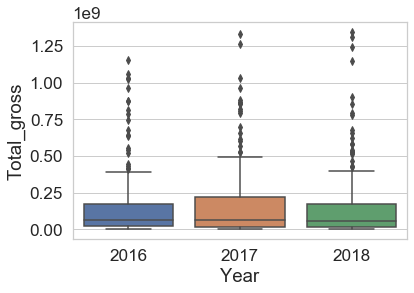

In [82]:
# viewing the three most recent years from the dataset
sns.set_style("whitegrid")
sns.boxplot(x="Year", y="Total_gross", data=bom_2016_18_df)

#### Top grossing movies are and have been far above the norm.

### Now let's take a look at `tn_movie_budgets`

#### We see from our previews that budget and gross fields have dollar signs, commas, and a text data type. Let's clean that up.

In [24]:
cur.execute('''SELECT *
                    FROM tn_movie_budgets
                    LIMIT 5;''')

tn_df = pd.DataFrame(cur.fetchall())
tn_df.columns = [x[0] for x in cur.description]
tn_df.dtypes

tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
# make a clean df for `tn_df`
cur.execute('''SELECT *
                    FROM tn_movie_budgets
                    ;
                    ''')

tn_df_clean = pd.DataFrame(cur.fetchall())
tn_df_clean.columns = [x[0] for x in cur.description]

In [26]:
# note: sorting will have no effect until text values are converted
# tn_df_clean.sort_values(by=['worldwide_gross'], ascending=False).head(10)

In [27]:
# verify correct column selection to clean
tn_df_clean.columns[3:]

Index(['production_budget', 'domestic_gross', 'worldwide_gross'], dtype='object')

#### We need large integer data types for these fields. Symbols and separators must be removed to do this. Method chaining keeps the operation efficient.

In [28]:
# `convert_dollars_to_int(df, col)` accepts a dataframe and a column
# encountered errors
# we can quickly pass each of the necessary args via a loop
for col in tn_df_clean.columns[3:]:
    tn_df_clean[col] = tn_df_clean[col].str.replace("$", "").str.replace(",", "").astype('int64')

tn_df_clean.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [29]:
# view the top - ten in order of `worldwide_gross`
display(tn_df_clean.head(10).sort_values(by=['worldwide_gross'], ascending=False))

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350


#### That's a bit different than the `bom...` table. The top earner far oupaces that from the previous dataframe. A data dictionary could help us to differentiate earnings sources reflected in the data (eg., strictly box office vs all media) as well as providing  clearer understanding for when data were collected.

### The `tn...` dataframe also enables us to compute net earnings figures.

In [30]:
tn_df_clean['Worldwide_net'] = tn_df_clean['worldwide_gross'] - tn_df_clean['production_budget']
display(tn_df_clean.head(10).sort_values(by=['Worldwide_net'], ascending=False))

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide_net
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650


### What can we infer from a cursory visual analysis of `production_budget`, `worldwide_gross`, and `Worldwide_net`"

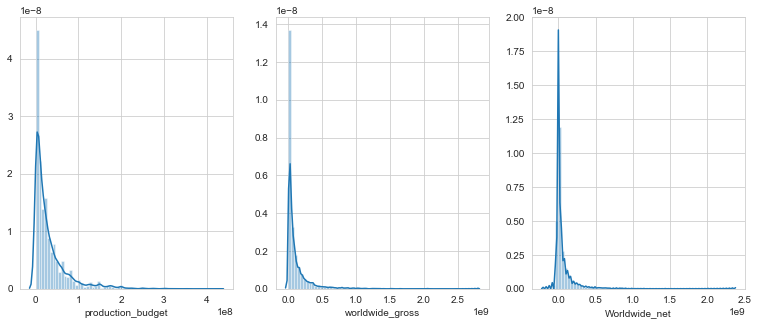

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(13, 5))
sns.distplot(tn_df_clean.production_budget, bins = 65, ax=ax[0])
sns.distplot(tn_df_clean.worldwide_gross, bins = 65, ax=ax[1])
sns.distplot(tn_df_clean.Worldwide_net, bins = 65, ax=ax[2])

plt.show()


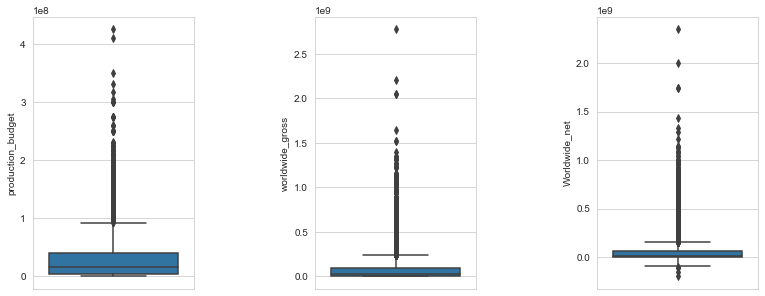

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(13, 5))
sns.boxplot(tn_df_clean.production_budget,  orient='v', ax=ax[0])
sns.boxplot(tn_df_clean.worldwide_gross,  orient='v', ax=ax[1])
sns.boxplot(tn_df_clean.Worldwide_net,  orient='v', ax=ax[2])

plt.subplots_adjust(wspace=.75, hspace=.5);

plt.show()


### It seems a few things are highly funded (far from the median), most are modestly funded, and relatively high net profit is rare thing.

In [33]:
# in numbers for `production_budget`
tn_df_clean.production_budget.describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

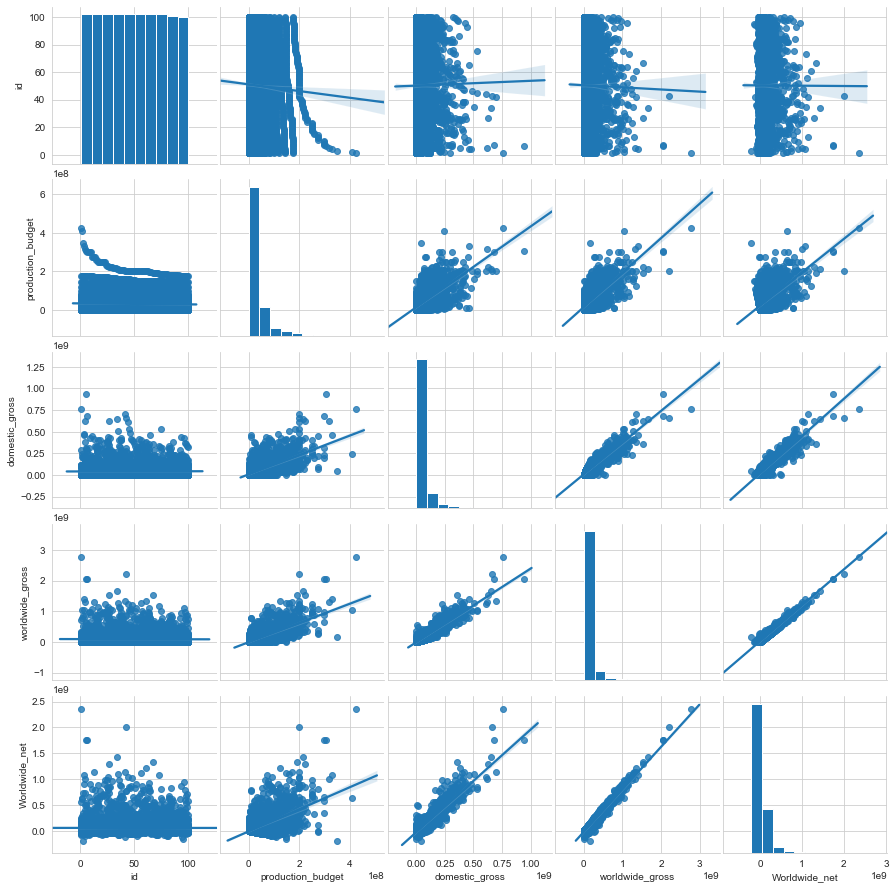

In [34]:
# view a seaborn pairplot matrix with regression lines
sns.pairplot(tn_df_clean, kind="reg")
sns.set(font_scale=.8) # try to prevent overlap of long column names
plt.subplots_adjust(wspace=.02, hspace=.1);
plt.show()

### We see from the visualization that budget is correlated with net and gross figures.

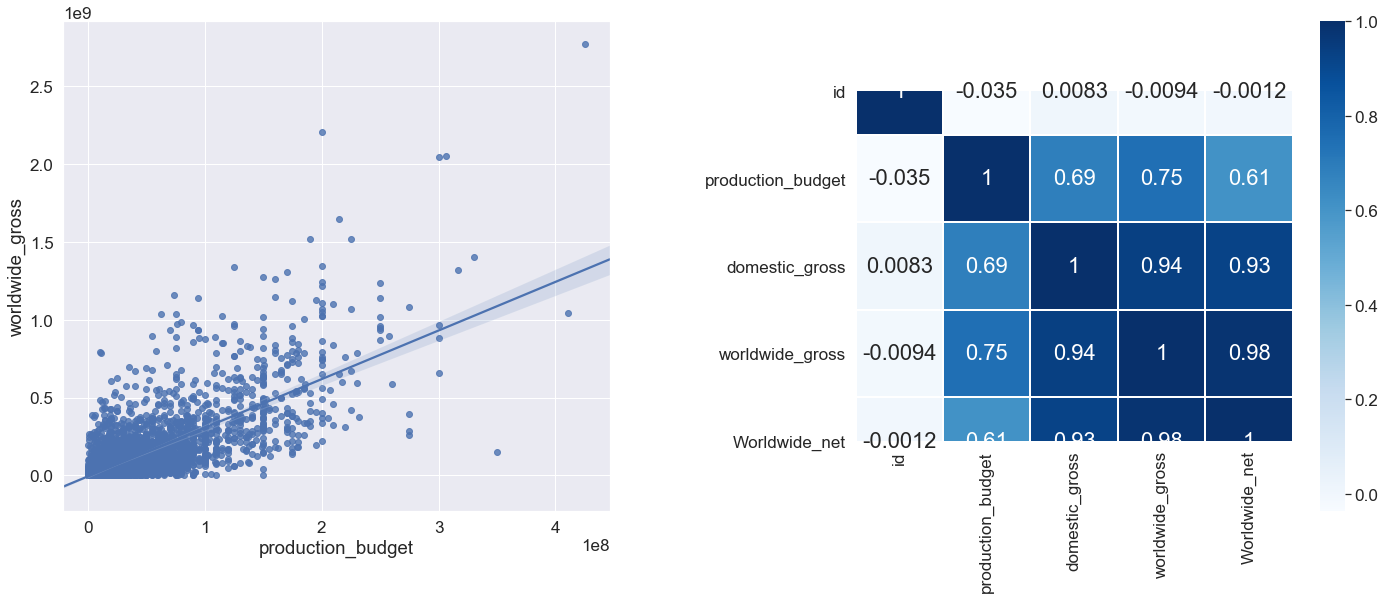

In [35]:
# create a variable for the correlation
corr = tn_df_clean.corr()

# subplots
plt.figure(figsize=(24,9)) # total figure size
plt.subplots_adjust(wspace=.45, hspace=.1); # prevent overlap
sns.set(font_scale=1.55) # adjust for annotation legibility

plt.subplot(1,2,1) # correlation with regression line
sns.regplot(x='production_budget', y='worldwide_gross', data=tn_df_clean)

plt.subplot(1,2,2) # heatmap
sns.heatmap(corr,  cbar=True, linecolor="w", linewidths=1, cmap='Blues', square=True, annot=True, annot_kws={"size": 22})

### For what it is worth, the heatmap of the table suggests that budget has a slightly stronger corellation with `worldwide_gross` than with `domestic_gross`.

### Before we go further, it could be worthwhile to determine whether the `tn_df_clean` dataframe can be joined to the `bom_2016_18_df` dataframe. Their respective `movie` and `title` columns appear promising.

In [36]:
# Can we find a movie by the same name?
display(tn_df_clean.loc[tn_df_clean.movie == 'Dark Phoenix'])
display(bom_2016_18_df.loc[bom_2016_18_df.title == 'Dark Phoenix'])

# rt_genres = pd.merge(rt_df_clean, df1, left_index=True, right_index=True)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide_net
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650


,title,studio,domestic_gross,foreign_gross,year,Total_gross


In [98]:
print("`tn`", "-"*80)
print("\n", tn_df_clean.info())
print("`bom`", "-"*80)
print("\n", bom_2016_18_df.info())

`tn` --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
Worldwide_net        5782 non-null int64
dtypes: int64(5), object(2)
memory usage: 316.3+ KB

 None
`bom` --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 2322 to 3386
Data columns (total 7 columns):
title             1065 non-null object
studio            1064 non-null object
domestic_gross    1061 non-null float64
foreign_gross     546 non-null float64
year              1065 non-null datetime64[ns]
Year              1065 non-null int64
Total_gross       542 

#### We observe a significant mismatch in the number of entries. A joined table could miss more than 80% of the movies in `tn_df_clean`.

<h3 align='center'><font color='coral'>by studio</font></h3>

In [99]:
# ... the 5 highest grossing studios
print("2018", bom_2018_df.groupby('studio').sum(
).sort_values(by=['Total_gross'], ascending=False).head())


print("-"*80)

print("2016-2018", bom_2016_18_df.groupby('studio').sum(
).sort_values(by=['Total_gross'], ascending=False).head())

2018         domestic_gross  foreign_gross   Year   Total_gross
studio                                                    
BV        3.045600e+09   2.621801e+09  20180  5.667401e+09
WB        1.729100e+09   3.786400e+09  34306  5.494300e+09
Uni.      1.790455e+09   3.110600e+09  42378  4.900200e+09
Sony      9.566925e+08   1.658936e+09  30270  2.615626e+09
Fox       8.403000e+08   1.743200e+09  22198  2.583500e+09
--------------------------------------------------------------------------------
2016-2018         domestic_gross  foreign_gross    Year   Total_gross
studio                                                     
BV        8.294800e+09   1.096170e+10   62524  1.925650e+10
WB        4.602865e+09   8.230100e+09   84719  1.281100e+10
Uni.      4.696855e+09   7.584623e+09  100856  1.227112e+10
Fox       3.627200e+09   6.890133e+09   82692  1.051733e+10
Sony      2.718572e+09   5.100436e+09   92782  7.818804e+09


#### Looks like we have an issue with `Year` values being summed.

<h3 align='center'><font color='coral'>by genre</font></h3>

## So how about those genres?

### `rt_movie_info` has a genre field, as well as a box office field, so that might make a good transition as we move our investigation toward the next category.

In [41]:
# make a clean df for `rt_movie_info`
cur.execute('''SELECT *
                    FROM rt_movie_info
                    ;
                    ''')

rt_df_clean = pd.DataFrame(cur.fetchall())
rt_df_clean.columns = [x[0] for x in cur.description]

In [42]:
# let's see what shape the dataframe is in
print("rows and columns:", rt_df_clean.shape)

# how many values are missing
print("number of 'box_office' missing values:", rt_df_clean['box_office'].isna().sum())

# we may as well take a deeper look while we're at it
display(rt_df_clean.head(5).sort_values(by=['box_office'], ascending=False))

rows and columns: (1560, 12)
number of 'box_office' missing values: 1220


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,None,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,None,128 minutes,None
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,None,200 minutes,None


#### Whoa! That's a rotten number of missing values. And where are the movie titles?
#### Breaking - out those genre categories may be useful for joining tables as we go forward. 

In [43]:
# split `rt_df_clean.genre` values to a new dataframe
df1 = rt_df_clean.genre.str.split("|", expand=True)
df1.columns = "g1 g2 g3 g4 g5 g6 g7".split()
df1

,g1,g2,g3,g4,g5,g6,g7
0,Action and Adventure,Classics,Drama,None,None,None,None
1,Drama,Science Fiction and Fantasy,None,None,None,None,None
2,Drama,Musical and Performing Arts,None,None,None,None,None
3,Drama,Mystery and Suspense,None,None,None,None,None
4,Drama,Romance,None,None,None,None,None
...,...,...,...,...,...,...,...
1555,Action and Adventure,Horror,Mystery and Suspense,None,None,None,None
1556,Comedy,Science Fiction and Fantasy,None,None,None,None,None
1557,Classics,Comedy,Drama,Musical and Performing Arts,None,None,None
1558,Comedy,Drama,Kids and Family,Sports and Fitness,None,None,None


In [44]:
# Create a list of unique genres for future use
genre_list = []

for cols in df1.columns:
    for v in df1[cols]: # check values in all columns
        if v != None: # disregard None values
            if v not in genre_list:
                genre_list.append(v) # add to the list

genre_list

['Action and Adventure',
 'Drama',
 'Comedy',
 'Documentary',
 'Classics',
 'Art House and International',
 'Musical and Performing Arts',
 'Horror',
 'Mystery and Suspense',
 'Animation',
 'Special Interest',
 'Kids and Family',
 'Western',
 'Science Fiction and Fantasy',
 'Romance',
 'Sports and Fitness',
 'Television',
 'Cult Movies',
 'Anime and Manga',
 'Faith and Spirituality',
 'Gay and Lesbian']

#### Merge the df1 genre columns to  `rt_df_clean` as a new data frame.

In [45]:
# join the two datframes to add genre columns to each row
# these dataframes share the same indices
rt_genres = pd.merge(rt_df_clean, df1, left_index=True, right_index=True)
display(rt_genres.head(1))

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,g1,g2,g3,g4,g5,g6,g7
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None,Action and Adventure,Classics,Drama,None,None,None,None


### The next table from imdb. Let's see how useful they are for investigating genre.

In [46]:
# make a clean df for `...basics`
cur.execute('''SELECT *
                    FROM imdb_title_basics
                    ;
                    ''')

imdb_basics_df_clean = pd.DataFrame(cur.fetchall())
imdb_basics_df_clean.columns = [x[0] for x in cur.description]

In [47]:
imdb_basics_df_clean.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


### Let's see if the genre list is the same as the previous dataframe.

In [48]:
# create an empty list for this dataframe's genres
imdb_genres = []

a = imdb_basics_df_clean.genres.unique() # returns a numpy array
b = [str(i) for i in a] # returns a list

b = list(filter(None, b)) # remove None values

print(b[0:5])

['Action,Crime,Drama', 'Biography,Drama', 'Drama', 'Comedy,Drama', 'Comedy,Drama,Fantasy']


#### Here we have words, with un-spaced commas inseparable from permanent compound-word arrays.

In [49]:
# let's create a function to test this
def split_list_of_strings(list, separator):
    print("the first item is", list[0])
    for item in b:
        item.split(",", 5) # long enough to check for all commas
    print("...the first item is now", list[0])

split_list_of_strings(b, ",")

the first item is Action,Crime,Drama
...the first item is now Action,Crime,Drama


In [50]:
item_count = 0

for item in b:
    if "Crime" in item:
        item_count += 1


#### Let's move on.

***

<h2 align='center'><font color='chocolate'>Top Net</font></h2>

<h3>Question(s)</h3>

* First

<h3 align='center'><font color='coral'>by title</font></h3>

<h3 align='center'><font color='coral'>by studio</font></h3>

<h3 align='center'><font color='coral'>by genre</font></h3>

***

***

<h2 align='center'><font color='chocolate'>Correlation</font></h2>

<h3>Question(s)</h3>

* First

<h3 align='center'><font color='coral'>gross, net</font></h3>

<h3 align='center'><font color='coral'>genre, gross</font></h3>

<h3 align='center'><font color='coral'>genre, net [only if gross, net not correlated</font></h3>

***

<h2 align='center'><font color='chocolate'>Top Studios</font></h2>

<h3>Question(s)</h3>

* First

<h3 align='center'><font color='coral'>gross genre mix</font></h3>

<h3 align='center'><font color='coral'>net genre mix</font></h3>

***

<h2 align='center'><font color='chocolate'>Final Recommendations</font></h2>

In [51]:
# looking at ...
# plt.figure(figsize=(8, 5))
# sns.violinplot(x='year', y='Total_gross', data=bom_2016_18_df)